In [137]:
!pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [138]:
from pyathena import connect
import pandas as pd

In [139]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'viamericas'
database_name2= 'analytics'
table1_name = 'forex_feed_market'
table2_name = 'daily_check'
##DAILY CHECK IS THE DATABASE VALIDATED WITH THE CLIENT, IT DOES NOT COUNT CANCELLATIONS OR VIRTUAL AGENCIES##

In [140]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
#df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table1_name};', conn)
df2 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{table2_name};', conn)

In [141]:
df2.shape

(101970, 5)

In [142]:
df2.head()

,payer,country,date,tx,amount
0,TRANSFERTO - THUNES,BELGIUM,2023-04-03,1,55.55
1,ARGENPER,PERU,2023-04-03,26,4203.70
2,NAFA,"GAMBIA, THE",2023-04-03,8,1086.50
3,WALDOS (APPRIZA),MEXICO,2023-08-31,14,4797.50
4,BANPAIS (RED CHAPINA),HONDURAS,2021-05-06,43,17493.00


In [143]:
##TO SPEED UP THE LOADING, WE ALREADY WORK WITH THE EXTRACTED CSV##

In [144]:
df1=pd.read_csv('rates_completo.csv')

In [145]:
df1.symbol.unique()

array(['USDBRL', 'USDINR', 'USDGTQ', 'USDMXN', 'USDPHP'], dtype=object)

In [146]:
##WE FILTER DATA FOR MEXICO##

In [147]:
df_mex=df1.loc[df1.symbol=='USDMXN']

In [148]:
##WE OBTAIN THE LAST VALUE OF THE EXCHANGE RATE OF EACH DAY ##

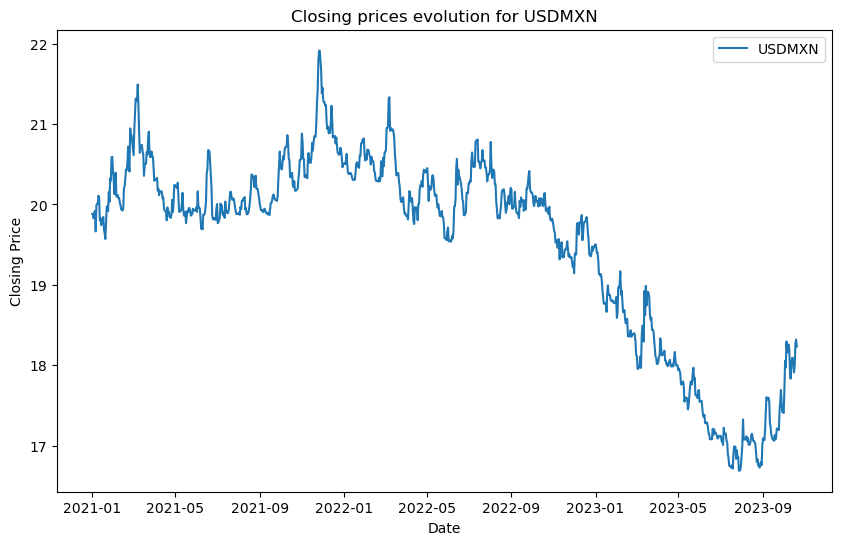

      symbol  feed_date  feed_price
0     USDMXN 2021-01-01     19.8822
1     USDMXN 2021-01-02     19.8822
2     USDMXN 2021-01-03     19.8282
3     USDMXN 2021-01-04     19.9046
4     USDMXN 2021-01-05     19.9196
...      ...        ...         ...
1018  USDMXN 2023-10-16     17.9119
1019  USDMXN 2023-10-17     18.0094
1020  USDMXN 2023-10-18     18.2726
1021  USDMXN 2023-10-19     18.3207
1022  USDMXN 2023-10-20     18.2351

[1023 rows x 3 columns]


In [149]:
import pandas as pd
import matplotlib.pyplot as plt

def get_closing_prices(data, start_date, end_date):
    # Convert the 'FEED_DATE' column to datetime type if it is not already
    data['feed_date'] = pd.to_datetime(data['feed_date'])

    # Filter by date range
    data_filtered = data[(data['feed_date'] >= start_date) & (data['feed_date'] <= end_date)]

    # Sort by 'FEED_DATE' to ensure that the data is in chronological order
    data_filtered = data_filtered.sort_values(by='feed_date')

    # Group by 'SYMBOL' and 'FEED_DATE', taking the last value of 'FEED_PRICE'
    data_grouped = data_filtered.groupby(['symbol', pd.Grouper(key='feed_date', freq='D')])['feed_price'].last().reset_index()

    # Generate evolution plots for each SYMBOL
    for symbol in data_grouped['symbol'].unique():
        symbol_data = data_grouped[data_grouped['symbol'] == symbol]

        plt.figure(figsize=(10, 6))
        plt.plot(symbol_data['feed_date'], symbol_data['feed_price'], label=symbol)
        plt.title(f'Closing prices evolution for {symbol}')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.show()

    return data_grouped

# Using the function
# Suppose your DataFrame is named df
# Adjust the dates according to your needs
start_date = '2021-01-01'
end_date = '2023-10-21'

rates = get_closing_prices(df_mex, start_date, end_date)
print(rates)

In [150]:
rates.feed_date.nunique()

1023

In [151]:
fecha_inicio = pd.to_datetime('2021-01-01')
fecha_fin = pd.to_datetime('2023-10-21')

# Calcula la diferencia en días
diferencia_dias = (fecha_fin - fecha_inicio).days
print(diferencia_dias)

1023


In [152]:
rates.head(50)

,symbol,feed_date,feed_price
0,USDMXN,2021-01-01,19.8822
1,USDMXN,2021-01-02,19.8822
2,USDMXN,2021-01-03,19.8282
3,USDMXN,2021-01-04,19.9046
4,USDMXN,2021-01-05,19.9196
5,USDMXN,2021-01-06,19.6648
6,USDMXN,2021-01-07,19.9889
7,USDMXN,2021-01-08,20.0041
8,USDMXN,2021-01-09,20.0093
9,USDMXN,2021-01-10,20.1087


In [153]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101970 entries, 0 to 101969
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   payer    101970 non-null  object 
 1   country  101970 non-null  object 
 2   date     101970 non-null  object 
 3   tx       101970 non-null  int64  
 4   amount   101970 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.9+ MB


In [154]:
df2.amount.sum()

25110624454.414906

In [155]:
df2['date'] = pd.to_datetime(df2['date'])

In [156]:
##WE MERGE THE DATASETS TO HAVE TRADED AMOUNTS AND EXCHANGE RATES PER DAY##

In [157]:
rates = rates.rename(columns={'feed_date': 'date'})
rates['date'] = pd.to_datetime(rates['date'])

rates.head()

,symbol,date,feed_price
0,USDMXN,2021-01-01,19.8822
1,USDMXN,2021-01-02,19.8822
2,USDMXN,2021-01-03,19.8282
3,USDMXN,2021-01-04,19.9046
4,USDMXN,2021-01-05,19.9196


In [158]:
###WE OBTAIN THE LAGS OF UP TO 7 DAYS FOR THE EXCHANGE RATE 

In [159]:
for i in range(1, 8):
        nombre_columna = f'feed_price_retardo_{i}'
        rates[nombre_columna] = rates['feed_price'].shift(i)

In [160]:
rates.head(3)

,symbol,date,feed_price,feed_price_retardo_1,feed_price_retardo_2,feed_price_retardo_3,feed_price_retardo_4,feed_price_retardo_5,feed_price_retardo_6,feed_price_retardo_7
0,USDMXN,2021-01-01,19.8822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USDMXN,2021-01-02,19.8822,19.8822,NaN,NaN,NaN,NaN,NaN,NaN
2,USDMXN,2021-01-03,19.8282,19.8822,19.8822,NaN,NaN,NaN,NaN,NaN


In [161]:
##FILTERING MEXICO##

In [162]:
df_montos_mex=df2.loc[df2.country=='MEXICO']

In [163]:
df_montos_mex.shape

(22705, 5)

In [164]:
df_montos_mex.amount.sum()

13655009099.176899

In [165]:
###WE MERGE THE RESULTING DATABASE WITH THE DATABASE OF RATES##

In [166]:
df_final=pd.merge(df_montos_mex, rates, on='date', how='left')

In [167]:
df_final.head(3)

,payer,country,date,tx,amount,symbol,feed_price,feed_price_retardo_1,feed_price_retardo_2,feed_price_retardo_3,feed_price_retardo_4,feed_price_retardo_5,feed_price_retardo_6,feed_price_retardo_7
0,WALDOS (APPRIZA),MEXICO,2023-08-31,14,4797.50,USDMXN,17.0075,16.7580,16.7970,16.7801,16.7283,16.7544,16.7544,16.8330
1,ENVIOS CON CLABE (APPRIZA),MEXICO,2021-02-21,446,191520.10,USDMXN,20.5105,20.4272,20.4346,20.3323,20.2225,20.2081,19.9557,19.9241
2,EMPENOS DEL SUR (ANTERIOR BALSAS),MEXICO,2022-06-16,74,27455.13,USDMXN,20.4332,20.2468,20.5661,20.4631,20.0703,19.9768,19.9722,19.6714


In [168]:
##AS PART OF A PILOT TEST WE WILL ONLY WORK WITH ONE PAYER, AND THEN WE WILL GENERALIZE THE ROUTINE##
## WE WILL NOW FIT A MODEL WITH LAGS OF THE EXCHANGE RATE (SARIMAX) TO SEE IF IT PERFORMS BETTER THAN THE SIMPLE ARIMA MODEL.
##WE START WITH ELEKTRA AND THE CASE WITHOUT EXOGENOUS VARIABLES ##
df_pilot=df_final.loc[df_final.payer=='ELEKTRA (MEXICO)']
df_pilot.shape

(1025, 14)

In [169]:
##SALES EVOLUTION GRAPH

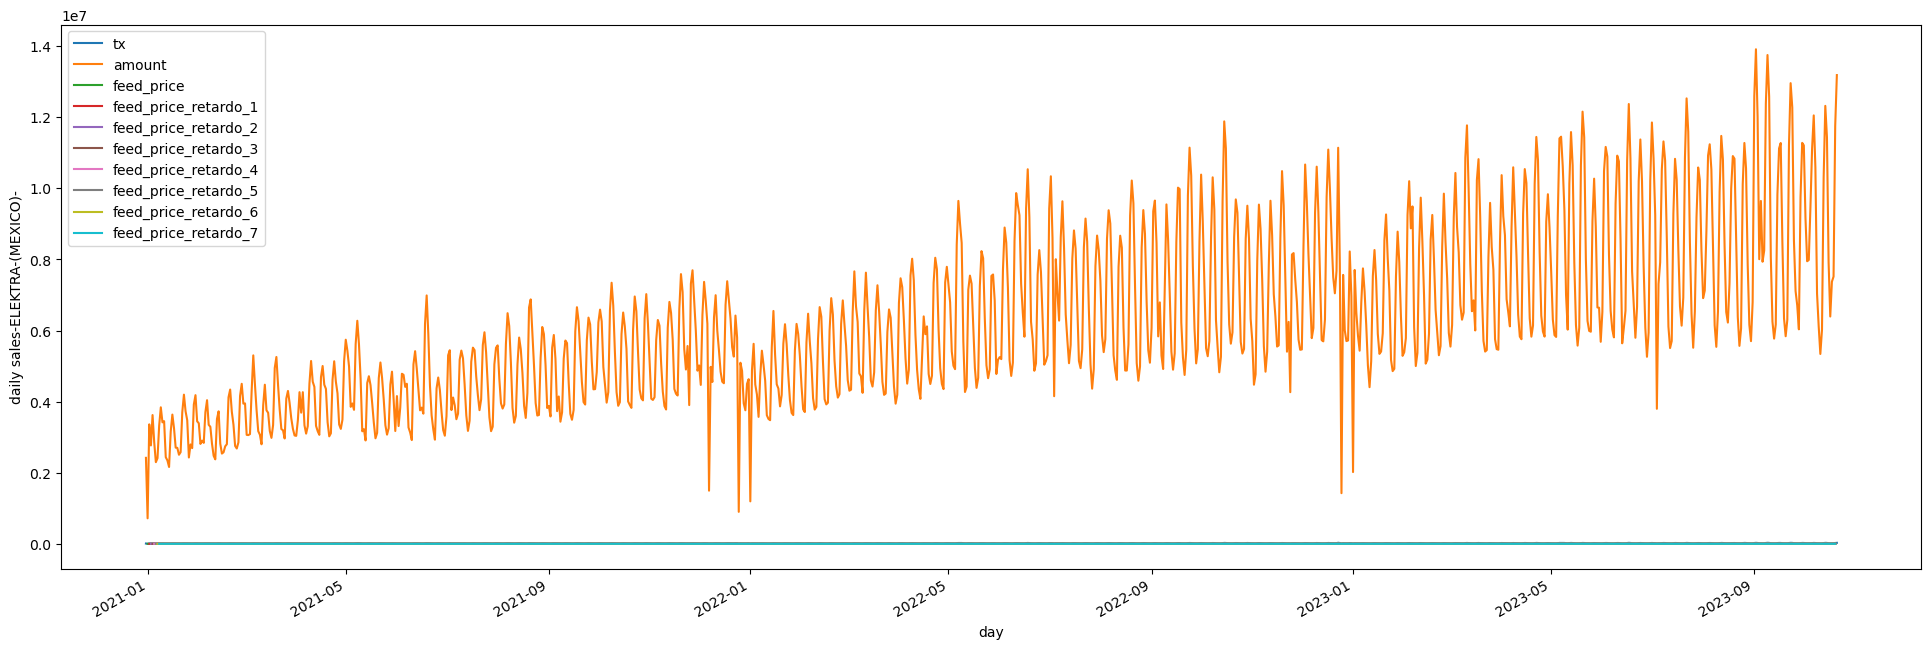

In [170]:
ax = df_pilot.set_index('date').plot(figsize=(24, 8))
ax.set_ylabel('daily sales-ELEKTRA-(MEXICO)-')
ax.set_xlabel('day')
plt.show()

In [171]:
##TIME SERIES FORMAT
data = df_pilot
data.dtypes #day object
data['date'] = pd.DatetimeIndex(data['date'])
df_pilot.dtypes   # datetime64[ns]

data.index  #RangeIndex()
data = data.set_index('date')

In [172]:
##WE ELIMINATE STRING VARIABLES AND OTHER VARIABLES##
data=data.loc[:,['amount']]

In [173]:
data = data.sort_values(by='date')

In [174]:
data.head(3)

,amount
date,
2020-12-31,2418346.71
2021-01-01,717241.42
2021-01-02,3360407.85


In [175]:
##WE DECOMPOSE THE SERIES INTO TREND, SEASONALITY AND RESIDUALS

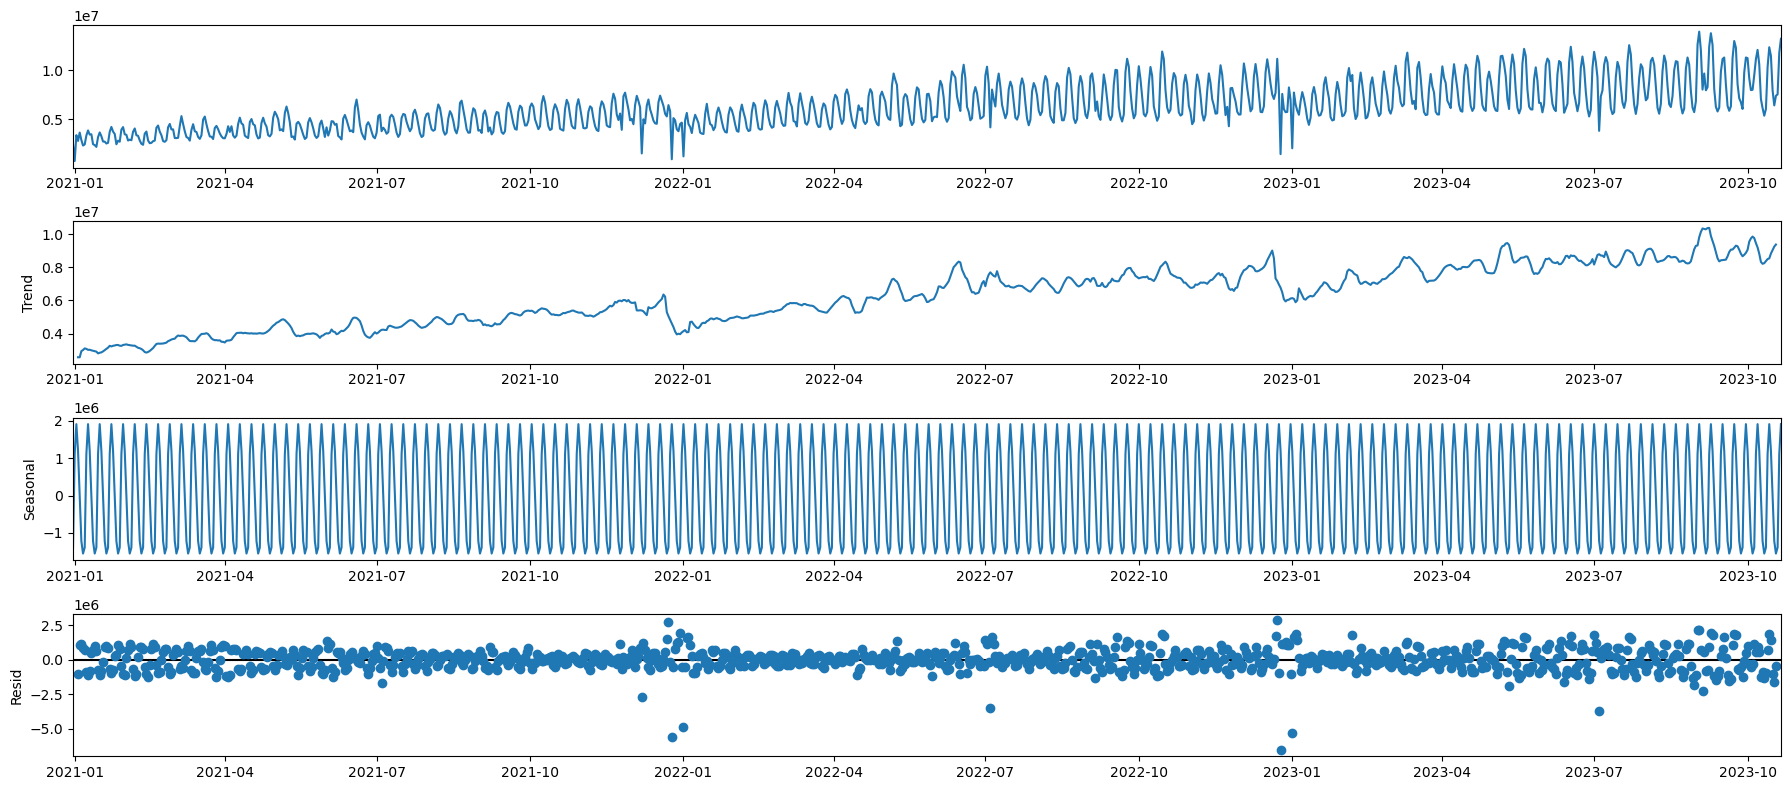

In [176]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=None) #multiplicative, additive
fig = decomposition.plot()
plt.show()

In [177]:
##STATIONARITY TESTS AUTOCORRELATION GRAPHS
##NON-STATIONARY SERIES##
##The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. 
##If the pvalue is above a critical size, then we cannot reject that there is a unit root.
##In this case (ELEKTRA MÉXICO) we check that the series is non-stationary (0.58>0.05)

ADF Statistic: -1.391752
p-value: 0.586224
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


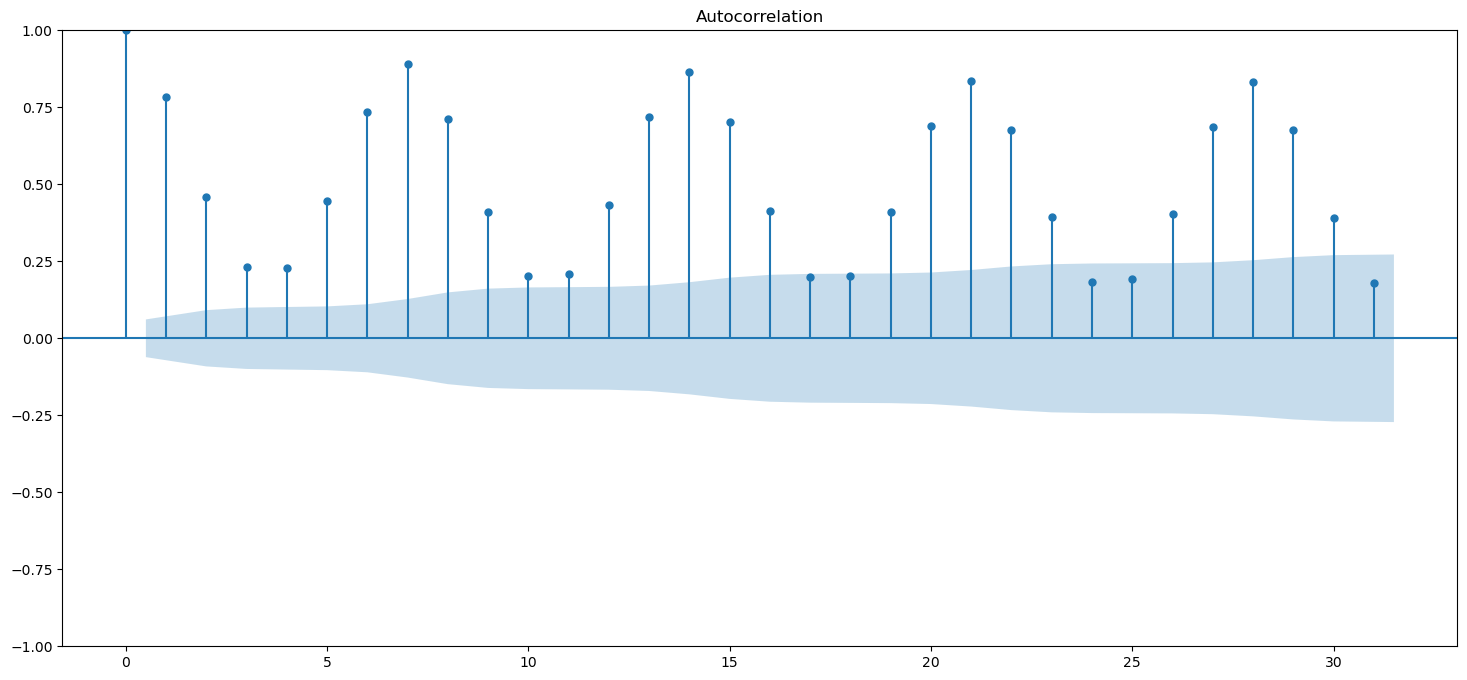

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

result = adfuller(data["amount"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

plot_acf(data)
plt.show()

In [179]:
##PARTIAL AUTOCORRELATION##
##CORRELATION IN SALES AT TIME K AND K-NLAGS BACKWARDS
##EVEN LAG 14 SEEMS TO EXPLAIN TODAY'S AMOUNT (ELEKTRA CASE).
from statsmodels.graphics.tsaplots import plot_pacf

In [180]:
##ARIMA PARAMETER SEARCH##

In [181]:
##SPLIT THE DATABASE INTO TRAIN AND TEST (WITH THE DATABASE SORTED TEMPORALLY)##

In [182]:
traindata = data[0:801] #data[0:800]
traindata.index

DatetimeIndex(['2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09',
               ...
               '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05',
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11'],
              dtype='datetime64[ns]', name='date', length=801, freq=None)

In [183]:
testdata = data[801:1025] #data[801:1025]
testdata.index

DatetimeIndex(['2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21',
               ...
               '2023-10-12', '2023-10-13', '2023-10-14', '2023-10-15',
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-21'],
              dtype='datetime64[ns]', name='date', length=224, freq=None)

In [184]:
traindata.shape, testdata.shape

((801, 1), (224, 1))

In [185]:
##WE INSTALL A TIME SERIES LIBRARY THAT HELPS US TO SELECT THE BEST ARIMA MODEL AUTOMATICALLY##
!pip install pmdarima


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [186]:
##WE APPLY THE AUTOARIMA MODULE THAT SELECTS THE BEST MODEL FROM AMONG SEVERAL CANDIDATES
## BASED ON THE AUTOCORRELATION GRAPH, WE OBSERVE THAT VALUES OF UP TO 14 LAGS CAN AFFECT TODAY'S AMOUNT. WHICH IMPLIES P AND Q MAX=14 (ALWAYS TAKE CARE OF MODEL PARSIMONY).

In [187]:
# Import the library, require install and restart, uncomment to use
from pmdarima import auto_arima 

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function  dataset 
# Adjusts the best arima model by looking for the one that minimizes the Akaike criterion (AIC)
stepwise_fit = auto_arima(traindata['amount'], start_p = 1, start_q = 1, 
                          max_p = 14, max_q = 14, m = 7 , 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
#p:The order of the auto-regressive (AR) model (i.e., the number of lag observations). A time series is considered AR when previous values in the time series are very predictive of later values.
#d:The degree of differencing.
#q:The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data. An MA process is a linear combination of past errors.

# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=23703.299, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=24092.183, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=23803.554, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=23745.375, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=24092.650, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=23885.802, Time=0.21 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=23675.235, Time=0.59 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=23804.741, Time=0.45 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=23674.275, Time=1.54 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=23756.285, Time=1.04 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=23672.154, Time=2.47 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=23672.566, Time=1.78 sec
 ARIMA(0,0,1)(2,1,2)[7] intercept   : AIC=23722.347, Time=2.62 sec
 ARIMA(1,0,0)(2,1,2)[7] intercept   : AIC=23672.370, Time=2.12 sec
 ARIMA(2,0,1)(2,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  801
Model:             SARIMAX(4, 0, 0)x(2, 1, [1, 2], 7)   Log Likelihood              -11825.696
Date:                                Mon, 08 Jan 2024   AIC                          23671.392
Time:                                        14:29:38   BIC                          23718.163
Sample:                                    12-31-2020   HQIC                         23689.366
                                         - 03-11-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.384e+04   9492.955      2.511      0.012    5230.147    4.24e+04
ar.L1          0.5339      0.021     25.023      0.000       0.492       0.576
ar.L2         -0.0336      0.038     -0.885      0.376      -0.108       0.041
ar.L3          0.0273      0.067      0.408      0.684      -0.104       0.159
ar.L4          0.0660      0.066      1.003      0.316      -0.063       0.195
ar.S.L7       -0.6014      0.208     -2.898      0.004      -1.008      -0.195
ar.S.L14       0.2338      0.098      2.376      0.018       0.041       0.427
ma.S.L7        0.0038      0.202      0.019      0.985      -0.392       0.400
ma.S.L14      -0.8101      0.193     -4.187      0.000      -1.189      -0.431
sigma2      6.641e+11      0.001    6.1e+14      0.000    6.64e+11    6.64e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19150.31
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.07   Skew:                            -2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.27e+30. Standard errors may be unstable.
"""

In [188]:
##IGNORE THIS CELL FOR NOW
# Manual grid search
import itertools
q = d = range(0, 2)
p=range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [189]:
##WE ASSIGN A TIME INDEX 
traindata.index = pd.DatetimeIndex(traindata.index.values,
                               freq=traindata.index.inferred_freq)

In [190]:
##WE ESTIMATE THE BEST MODEL SUGGESTED BY AUTO_ARIMA WITH THE SARIMAX MODULE (P=4,I=0,Q=0) (p=2,i=1,q=2,7-seven to indicate weekly seasonality-)
## FURTHERMORE, ADDITIONAL ESTIMATION CONTROLS ARE PRESENTED.
mod = sm.tsa.statespace.SARIMAX(traindata['amount'],  
                order = (4, 0, 0),  
                seasonal_order =(2, 1, 2, 7))  

results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47869D+01    |proj g|=  5.36460D-02


 This problem is unconstrained.



At iterate    5    f=  1.47719D+01    |proj g|=  2.53701D-03

At iterate   10    f=  1.47719D+01    |proj g|=  1.81436D-03

At iterate   15    f=  1.47712D+01    |proj g|=  3.28591D-03

At iterate   20    f=  1.47711D+01    |proj g|=  8.77550D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     23     28      1     0     0   2.351D-05   1.477D+01
  F =   14.771141236245619     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.

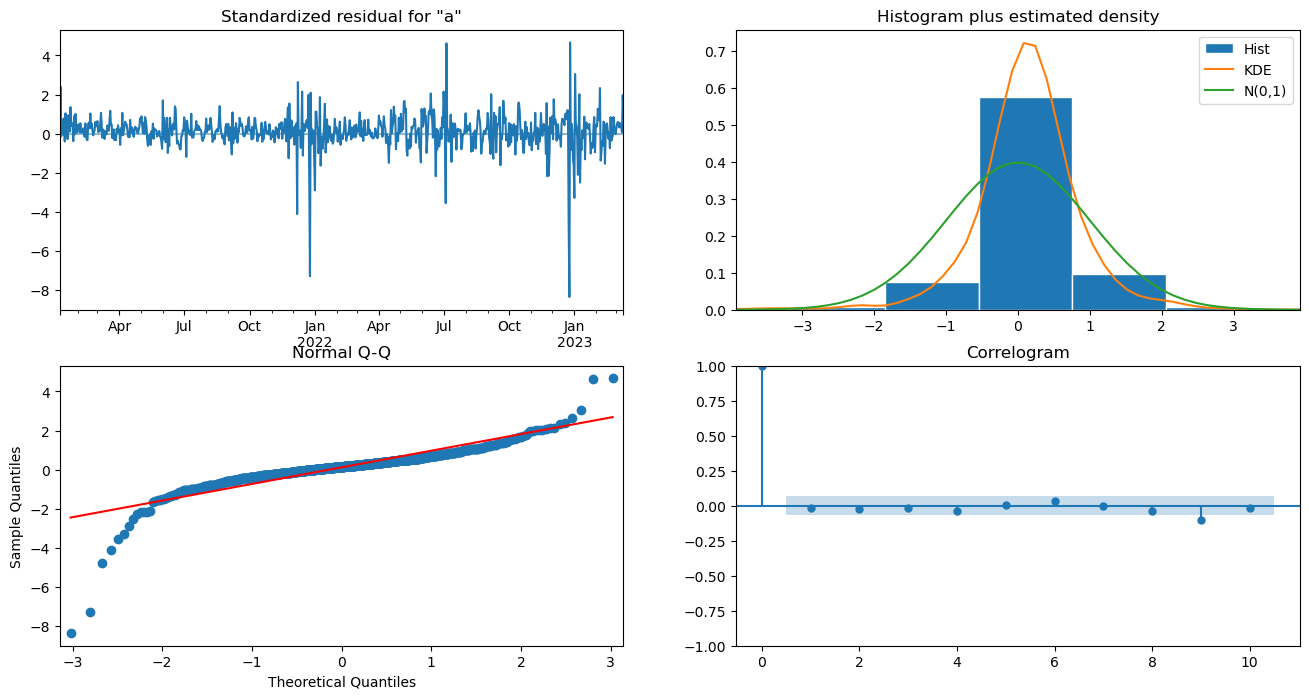

In [191]:
###NOTE THAT THERE ARE SOME DAYS WITH STRONG DEVIATIONS (DEC. 25, JAN. 1)
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [192]:
##WE NOW GENERATE THE FORECAST WITH THE ESTIMATED MODEL WITH THE TEST DATASET
pred = results.get_prediction(start=pd.to_datetime('2023-03-12'),end=pd.to_datetime('2023-03-30'), dynamic=False)
pred_test = pred.conf_int()
res = pred.predicted_mean
pred_test["result"] = pred.predicted_mean
pred_test["y"] = testdata
print("pred_test:\n", pred_test)

pred_test:
             lower amount  upper amount        result             y
2023-03-12  7.779020e+06  1.097489e+07  9.376957e+06  9.990582e+06
2023-03-13  6.522130e+06  1.016075e+07  8.341440e+06  7.865035e+06
2023-03-14  4.837656e+06  8.576528e+06  6.707092e+06  6.543219e+06
2023-03-15  4.265587e+06  8.043974e+06  6.154781e+06  6.847888e+06
2023-03-16  4.393205e+06  8.218076e+06  6.305640e+06  6.002096e+06
2023-03-17  7.732250e+06  1.158715e+07  9.659700e+06  1.023570e+07
2023-03-18  8.687499e+06  1.255690e+07  1.062220e+07  1.082097e+07
2023-03-19  6.676536e+06  1.084761e+07  8.762073e+06  9.213543e+06
2023-03-20  5.697163e+06  9.965172e+06  7.831167e+06  7.104772e+06
2023-03-21  4.136760e+06  8.434085e+06  6.285423e+06  5.707731e+06
2023-03-22  3.711926e+06  8.022308e+06  5.867117e+06  5.407997e+06
2023-03-23  3.962131e+06  8.284945e+06  6.123538e+06  5.449343e+06
2023-03-24  7.096187e+06  1.142684e+07  9.261514e+06  8.071606e+06
2023-03-25  7.947946e+06  1.228258e+07  1.011526e+

In [193]:
#FORECAST PERFORMANCE
##DEFINITIONS:
##The MAPE measures the average percentage error between predictions and actual values.
##The MAE is the arithmetic mean of the absolute errors between predictions and actual values.
##The RMSE measures the root mean square of the root mean square errors between predictions and actual values.
import numpy as np
pred_test["ae"] = abs(pred_test["y"]-pred_test["result"])
mae = pred_test["ae"].mean() 
print("mae:", mae)
mse = ((pred_test["y"]-pred_test["result"])**2).mean()
rmse = np.sqrt(mse)
print("rmse:", rmse)

pred_test["pe"] = abs((pred_test["y"]-pred_test["result"]) / pred_test["y"])
mape = pred_test["pe"].mean() 
print("mape:", mape)

mae: 459133.5415041398
rmse: 531995.295348202
mape: 0.06462442222067084


In [194]:
##MAPE=6.46% CON MODELO BASE SIN EXÓGENAS##

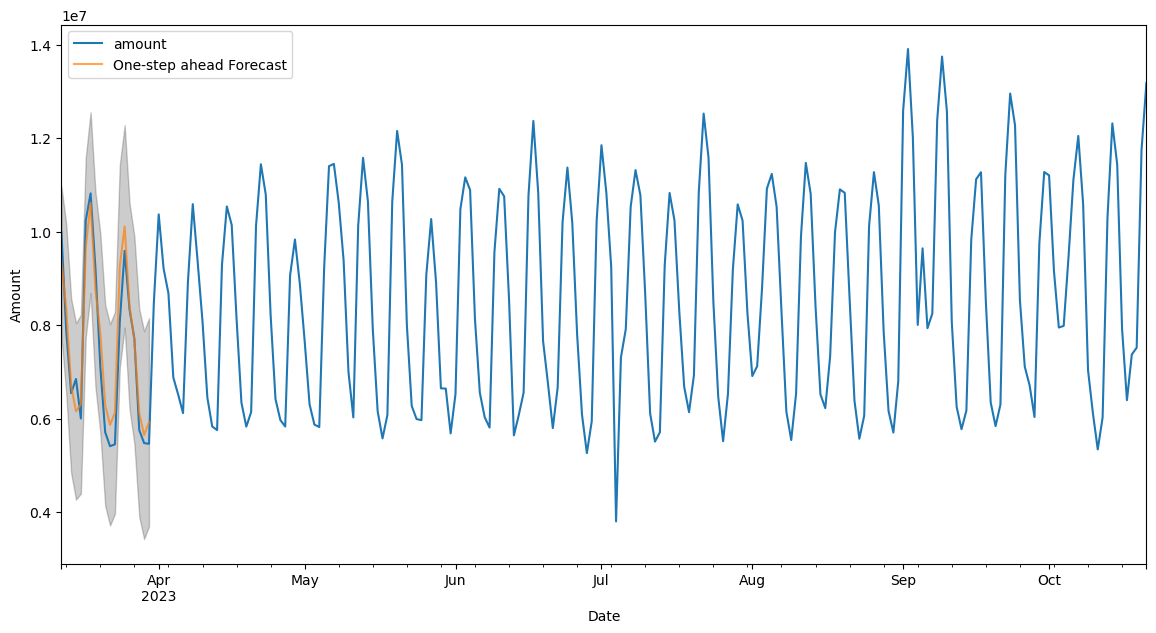

In [195]:
###GENERATE THE CONFIDENCE BANDS OF THE ESTIMATES (LOWER AND UPPER LIMIT) AND PLOT THE PREDICTED VALUE VS. THE ACTUAL VALUE

pred_ci = pred.conf_int()

#print("conf_int:", pred_ci)
#print("mean:", pred.predicted_mean)
p = pred.predicted_mean

ax = testdata.plot(label='observed')
#ax = traindata.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()

In [196]:
##WE NOW INCORPORATE THE EXCHANGE RATE LAGS AS PREDICTORS OF THE EXCHANGE RATE##

In [197]:
##TIME SERIES FORMAT
data2 = df_pilot
data2.dtypes #day object
data2['date'] = pd.DatetimeIndex(data2['date'])
df_pilot.dtypes   #Month datetime64[ns]

data2.index  #RangeIndex()
data2 = data2.set_index('date')

In [198]:
##WE ELIMINATE STRING VARIABLES##
data2=data2.loc[:,['amount', 'feed_price_retardo_1', 'feed_price_retardo_2', 'feed_price_retardo_3', 'feed_price_retardo_4', 'feed_price_retardo_5', 'feed_price_retardo_6', 'feed_price_retardo_7']]

In [199]:
data2 = data2.sort_values(by='date')

In [200]:
##SARIMAX PARAMETER SEARCH##

In [201]:
traindata2 = data2[0:801] #data[0:800]
traindata2=traindata2.loc[:,['amount', 'feed_price_retardo_1', 'feed_price_retardo_2', 'feed_price_retardo_3', 'feed_price_retardo_4', 'feed_price_retardo_5', 'feed_price_retardo_6', 'feed_price_retardo_7']]
traindata2.index

DatetimeIndex(['2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09',
               ...
               '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05',
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11'],
              dtype='datetime64[ns]', name='date', length=801, freq=None)

In [202]:
testdata2 = data2[801:1025] #data[801:1025]
testdata2=testdata2.loc[:,['amount', 'feed_price_retardo_1','feed_price_retardo_2', 'feed_price_retardo_3', 'feed_price_retardo_4', 'feed_price_retardo_5', 'feed_price_retardo_6', 'feed_price_retardo_7']]
testdata2.index


DatetimeIndex(['2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21',
               ...
               '2023-10-12', '2023-10-13', '2023-10-14', '2023-10-15',
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-21'],
              dtype='datetime64[ns]', name='date', length=224, freq=None)

In [203]:
traindata2.shape, testdata2.shape

((801, 8), (224, 8))

In [204]:
##WE TRY ANOTHER LIBRARY THAT DOES NOT HAVE PROBLEMS IN ADOPTING EXOGENOUS VARIABLES ##

###CLAVE: VER COMO ENTRENAR EL MODELO CON VARS EXOGENAS, NOTAR QUE ARRIBA SE LO ENTRENA CON AUTOARIMA (PROBLEMA, AUTOARIMA NO CAPTA POR ALGUNA RAZON LAS EXOGENAS)

import statsmodels.api as sm

###WE IMPUTE THE MISSING VALUES THAT GENERATE THE DIFFERENCES WITH SUBSEQUENT VALUES CLOSE IN TIME

traindata2=traindata2.fillna(method='bfill')
testdata2=testdata2.fillna(method='bfill')
traindata2=traindata2.fillna(method='ffill')
testdata2=testdata2.fillna(method='ffill')
exog=['feed_price_retardo_1','feed_price_retardo_2', 'feed_price_retardo_3', 'feed_price_retardo_4', 'feed_price_retardo_5', 'feed_price_retardo_6', 'feed_price_retardo_7']
mod = sm.tsa.SARIMAX(traindata2[['amount']], order=(1,0,0), seasonal_order =(2, 1, 2, 7), exog=traindata2[exog])
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                 amount   No. Observations:                  801
Model:             SARIMAX(1, 0, 0)x(2, 1, [1, 2], 7)   Log Likelihood              -11819.183
Date:                                Mon, 08 Jan 2024   AIC                          23664.367
Time:                                        14:29:46   BIC                          23725.169
Sample:                                    12-31-2020   HQIC                         23687.733
                                         - 03-11-2023                                         
Covariance Type:                                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
feed_price_retardo_1  1.151e+06   3.18e+05      3.622      0.0

In [205]:
testdata2.tail()

,amount,feed_price_retardo_1,feed_price_retardo_2,feed_price_retardo_3,feed_price_retardo_4,feed_price_retardo_5,feed_price_retardo_6,feed_price_retardo_7
date,,,,,,,,
2023-10-17,6394084.62,17.9119,18.0448,18.0913,18.0913,17.9574,17.8337,17.9358
2023-10-18,7372639.68,18.0094,17.9119,18.0448,18.0913,18.0913,17.9574,17.8337
2023-10-19,7517141.00,18.2726,18.0094,17.9119,18.0448,18.0913,18.0913,17.9574
2023-10-20,11755749.86,18.3207,18.2726,18.0094,17.9119,18.0448,18.0913,18.0913
2023-10-21,13185622.15,18.3207,18.2726,18.0094,17.9119,18.0448,18.0913,18.0913


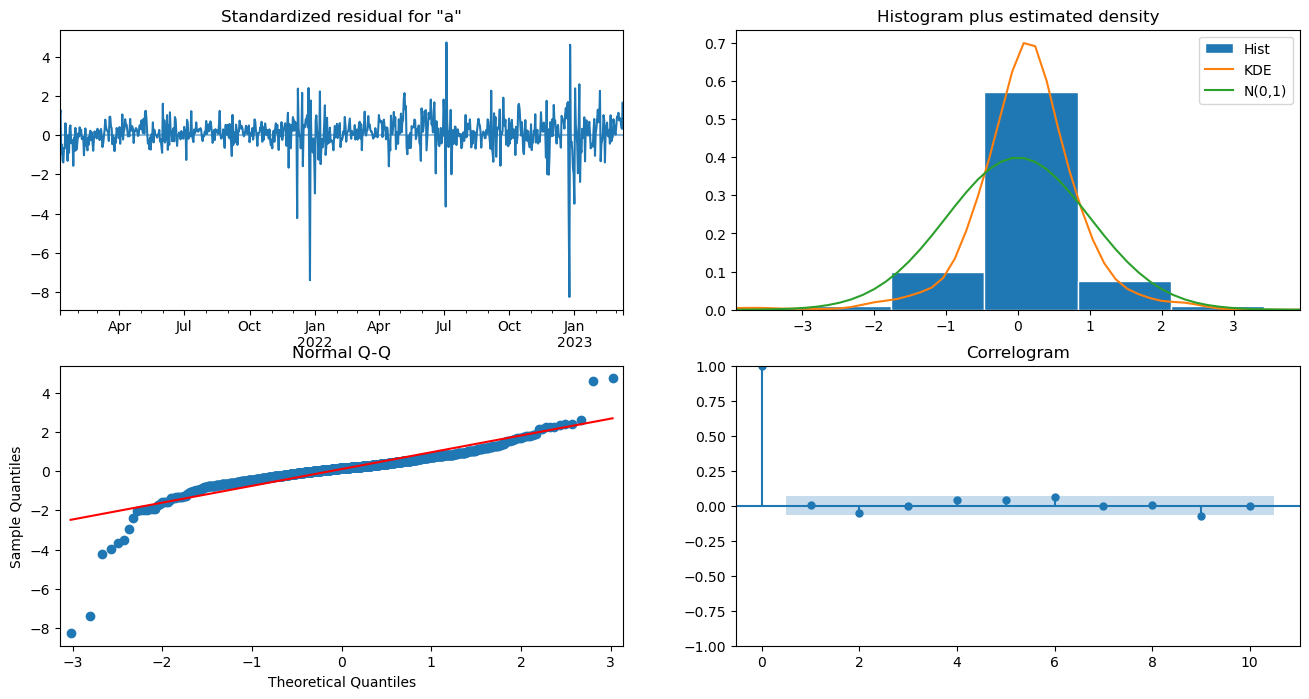

In [206]:
res.plot_diagnostics(figsize=(16, 8))
plt.show()

In [207]:
testdata2=testdata2[0:20]
pred2 = res.get_prediction(start=pd.to_datetime('2023-03-12'),end=pd.to_datetime('2023-03-31'), dynamic=False, exog=testdata2[exog])
pred_test2 = pred2.conf_int()
res2 = pred2.predicted_mean
pred_test2["result"] = pred2.predicted_mean
pred_test2["y"] = testdata2['amount']
print("pred_test2:\n", pred_test2)

pred_test2:
             lower amount  upper amount        result             y
2023-03-12  7.962153e+06  1.109839e+07  9.530270e+06  9.990582e+06
2023-03-13  6.484830e+06  9.942113e+06  8.213472e+06  7.865035e+06
2023-03-14  5.287257e+06  8.809811e+06  7.048534e+06  6.543219e+06
2023-03-15  4.125087e+06  7.661531e+06  5.893309e+06  6.847888e+06
2023-03-16  5.004540e+06  8.543966e+06  6.774253e+06  6.002096e+06
2023-03-17  7.916652e+06  1.145672e+07  9.686685e+06  1.023570e+07
2023-03-18  8.951211e+06  1.249142e+07  1.072131e+07  1.082097e+07
2023-03-19  6.810015e+06  1.061388e+07  8.711948e+06  9.213543e+06
2023-03-20  5.905051e+06  9.763304e+06  7.834177e+06  7.104772e+06
2023-03-21  4.173481e+06  8.043339e+06  6.108410e+06  5.707731e+06
2023-03-22  3.483406e+06  7.355758e+06  5.419582e+06  5.407997e+06
2023-03-23  3.749029e+06  7.621917e+06  5.685473e+06  5.449343e+06
2023-03-24  6.906175e+06  1.077918e+07  8.842676e+06  8.071606e+06
2023-03-25  7.778470e+06  1.165150e+07  9.714984e

In [208]:
#FORECAST PERFORMANCE
##DEFINITIONS:
##The MAPE measures the average percentage error between predictions and actual values.
##The MAE is the arithmetic mean of the absolute errors between predictions and actual values.
##The RMSE measures the root mean square of the root mean square errors between predictions and actual values.
import numpy as np
pred_test2["ae"] = abs(pred_test2["y"]-pred_test2["result"])
mae = pred_test2["ae"].mean() 
print("mae:", mae)
mse = ((pred_test2["y"]-pred_test2["result"])**2).mean()
rmse = np.sqrt(mse)
print("rmse:", rmse)

pred_test2["pe"] = abs((pred_test2["y"]-pred_test2["result"]) / pred_test2["y"])
mape = pred_test2["pe"].mean() 
print("mape:", mape)

mae: 370059.40479682136
rmse: 459310.5230133448
mape: 0.050709201356617696


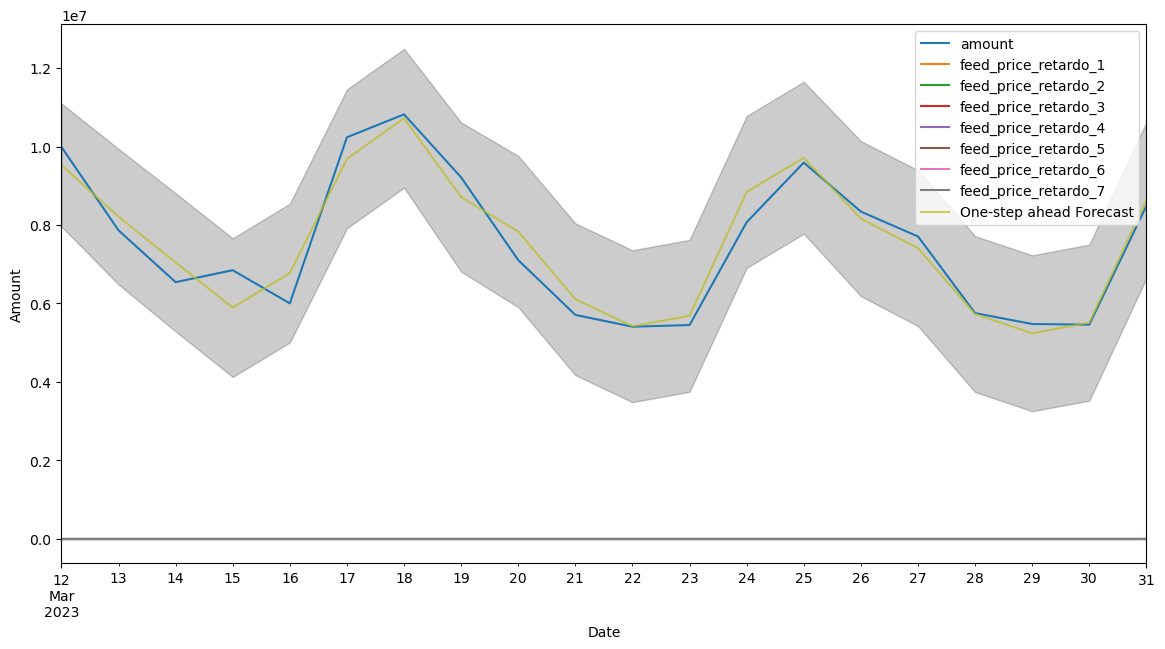

In [209]:
pred_ci2 = pred2.conf_int()

#print("conf_int:", pred_ci)
#print("mean:", pred.predicted_mean)
p = pred2.predicted_mean

ax = testdata2.plot(label='observed')
#ax = traindata.plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()

In [210]:
##SAME APPROACH BUT WORKING WITH DAILY EXCHANGE RATE DIFFERENCES

In [211]:
data3=data2.copy()

In [212]:
data3=data3.fillna(method='bfill')
data3=data3.fillna(method='ffill')

In [213]:
data3['var_rate_lag1']=data3.feed_price_retardo_1-data3.feed_price_retardo_2
data3['var_rate_lag2']=data3.feed_price_retardo_2-data3.feed_price_retardo_3
data3['var_rate_lag3']=data3.feed_price_retardo_3-data3.feed_price_retardo_4
data3['var_rate_lag4']=data3.feed_price_retardo_4-data3.feed_price_retardo_5
data3['var_rate_lag5']=data3.feed_price_retardo_5-data3.feed_price_retardo_6
data3['var_rate_lag6']=data3.feed_price_retardo_6-data3.feed_price_retardo_7
data3.tail(2)

,amount,feed_price_retardo_1,feed_price_retardo_2,feed_price_retardo_3,feed_price_retardo_4,feed_price_retardo_5,feed_price_retardo_6,feed_price_retardo_7,var_rate_lag1,var_rate_lag2,var_rate_lag3,var_rate_lag4,var_rate_lag5,var_rate_lag6
date,,,,,,,,,,,,,,
2023-10-20,11755749.86,18.3207,18.2726,18.0094,17.9119,18.0448,18.0913,18.0913,0.0481,0.2632,0.0975,-0.1329,-0.0465,0.0
2023-10-21,13185622.15,18.3207,18.2726,18.0094,17.9119,18.0448,18.0913,18.0913,0.0481,0.2632,0.0975,-0.1329,-0.0465,0.0


In [214]:
##WE ELIMINATE SOME VARIABLES##
data3=data3.loc[:,['amount', 'var_rate_lag1', 'var_rate_lag2', 'var_rate_lag3', 'var_rate_lag4', 'var_rate_lag5', 'var_rate_lag6']]
data3.tail()

,amount,var_rate_lag1,var_rate_lag2,var_rate_lag3,var_rate_lag4,var_rate_lag5,var_rate_lag6
date,,,,,,,
2023-10-17,6394084.62,-0.1329,-0.0465,0.0000,0.1339,0.1237,-0.1021
2023-10-18,7372639.68,0.0975,-0.1329,-0.0465,0.0000,0.1339,0.1237
2023-10-19,7517141.00,0.2632,0.0975,-0.1329,-0.0465,0.0000,0.1339
2023-10-20,11755749.86,0.0481,0.2632,0.0975,-0.1329,-0.0465,0.0000
2023-10-21,13185622.15,0.0481,0.2632,0.0975,-0.1329,-0.0465,0.0000


In [215]:
##SARIMAX PARAMETER SEARCH##

In [216]:
traindata3 = data3[0:801] #data[0:800]
traindata3.index

DatetimeIndex(['2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09',
               ...
               '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05',
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11'],
              dtype='datetime64[ns]', name='date', length=801, freq=None)

In [217]:
testdata3 = data3[801:1025] #data[801:1025]
testdata3.index

DatetimeIndex(['2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21',
               ...
               '2023-10-12', '2023-10-13', '2023-10-14', '2023-10-15',
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-21'],
              dtype='datetime64[ns]', name='date', length=224, freq=None)

In [218]:
traindata3.shape, testdata3.shape

((801, 7), (224, 7))

In [219]:
##WE TRY ANOTHER LIBRARY THAT DOES NOT HAVE PROBLEMS IN ADOPTING EXOGENOUS VARIABLES ##

###CLAVE: VER COMO ENTRENAR EL MODELO CON VARS EXOGENAS, NOTAR QUE ARRIBA SE LO ENTRENA CON AUTOARIMA (PROBLEMA, AUTOARIMA NO CAPTA POR ALGUNA RAZON LAS EXOGENAS)

import statsmodels.api as sm

###WE IMPUTE THE MISSING VALUES THAT GENERATE THE DIFFERENCES WITH SUBSEQUENT VALUES CLOSE IN TIME

exog3=['var_rate_lag1', 'var_rate_lag2', 'var_rate_lag3', 'var_rate_lag4', 'var_rate_lag5', 'var_rate_lag6']
mod2 = sm.tsa.SARIMAX(traindata3[['amount']], order=(1,0,0), seasonal_order =(2, 1, 2, 7), exog=traindata3[exog3])
res2 = mod2.fit(maxiter=1000, disp=False)
print(res2.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                 amount   No. Observations:                  801
Model:             SARIMAX(1, 0, 0)x(2, 1, [1, 2], 7)   Log Likelihood              -11821.585
Date:                                Mon, 08 Jan 2024   AIC                          23667.170
Time:                                        14:29:51   BIC                          23723.295
Sample:                                    12-31-2020   HQIC                         23688.738
                                         - 03-11-2023                                         
Covariance Type:                                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
var_rate_lag1  9.893e+05   2.02e+05      4.889      0.000    5.93e+05    1.3

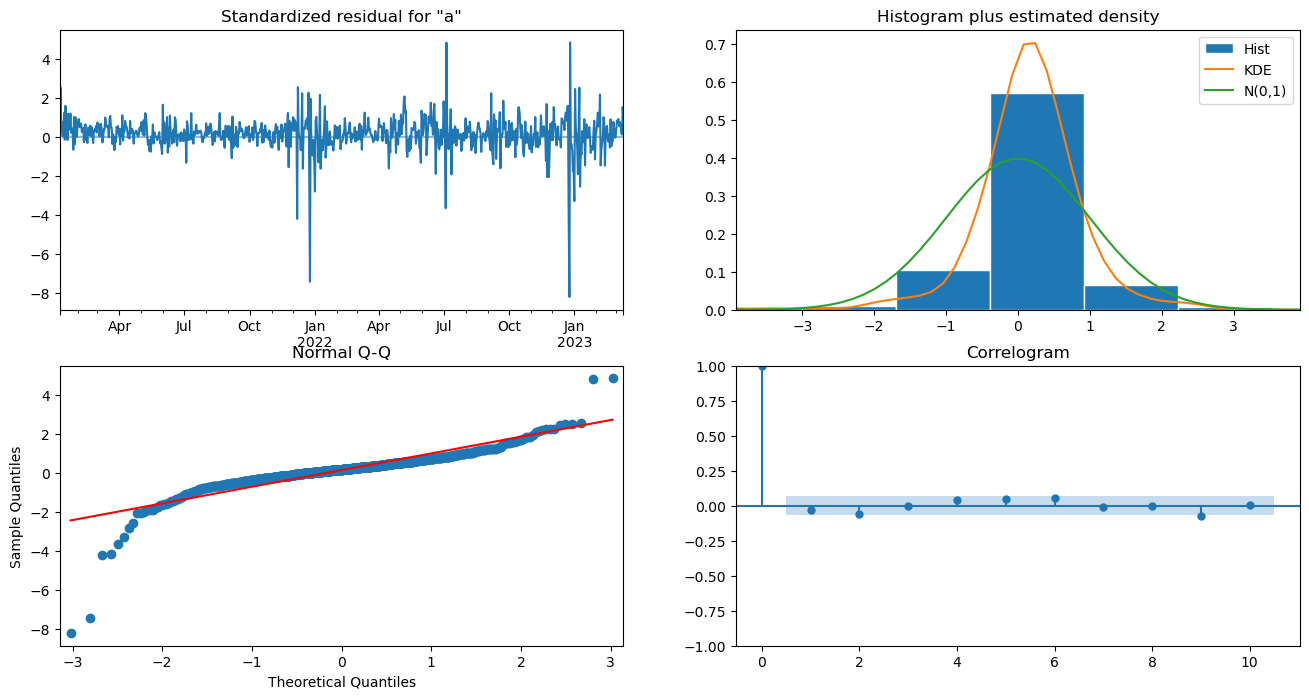

In [220]:
res2.plot_diagnostics(figsize=(16, 8))
plt.show()

In [221]:
testdata3=testdata3[0:20]
pred3 = res2.get_prediction(start=pd.to_datetime('2023-03-12'),end=pd.to_datetime('2023-03-31'), dynamic=False, exog=testdata3[exog3])
pred_test3 = pred3.conf_int()
res2 = pred3.predicted_mean
pred_test3["result"] = pred3.predicted_mean
pred_test3["y"] = testdata3['amount']
print("pred_test2:\n", pred_test3)

pred_test2:
             lower amount  upper amount        result             y
2023-03-12  8.042714e+06  1.117486e+07  9.608788e+06  9.990582e+06
2023-03-13  6.673060e+06  1.016936e+07  8.421212e+06  7.865035e+06
2023-03-14  5.306934e+06  8.887163e+06  7.097048e+06  6.543219e+06
2023-03-15  4.157297e+06  7.757876e+06  5.957587e+06  6.847888e+06
2023-03-16  4.870569e+06  8.476137e+06  6.673353e+06  6.002096e+06
2023-03-17  7.852359e+06  1.145915e+07  9.655756e+06  1.023570e+07
2023-03-18  8.889469e+06  1.249657e+07  1.069302e+07  1.082097e+07
2023-03-19  6.846105e+06  1.073124e+07  8.788671e+06  9.213543e+06
2023-03-20  5.798879e+06  9.749422e+06  7.774151e+06  7.104772e+06
2023-03-21  4.143672e+06  8.110143e+06  6.126907e+06  5.707731e+06
2023-03-22  3.431539e+06  7.401919e+06  5.416729e+06  5.407997e+06
2023-03-23  3.738088e+06  7.709430e+06  5.723759e+06  5.449343e+06
2023-03-24  6.866586e+06  1.083816e+07  8.852375e+06  8.071606e+06
2023-03-25  7.732342e+06  1.170398e+07  9.718160e

In [222]:
#FORECAST PERFORMANCE
##DEFINITIONS:
##The MAPE measures the average percentage error between predictions and actual values.
##The MAE is the arithmetic mean of the absolute errors between predictions and actual values.
##The RMSE measures the root mean square of the root mean square errors between predictions and actual values.
import numpy as np
pred_test3["ae"] = abs(pred_test3["y"]-pred_test3["result"])
mae = pred_test3["ae"].mean() 
print("mae:", mae)
mse = ((pred_test3["y"]-pred_test3["result"])**2).mean()
rmse = np.sqrt(mse)
print("rmse:", rmse)

pred_test3["pe"] = abs((pred_test3["y"]-pred_test3["result"]) / pred_test3["y"])
mape = pred_test3["pe"].mean() 
print("mape:", mape)

mae: 372455.33528168197
rmse: 449787.9107111034
mape: 0.05103655180949226


In [223]:
##MAPE BAJA DESDE 6.46% A 5.52% CON REZAGOS DE VARIACIONES DEL TIPO DE CAMBIO#
## Y TENER EN CUENTA QUE AÚN NO ENCONTRAMOS LA FORMA DE ENTRENAR CON EXÓGENAS CON AUTOARIMA
## VAMOS A ESTUDIAR LA LIBRERIA SKFORECAST QUE SUPUESTAMENTE PERMITE ENCONTRAR EL MEJOR MODELO CON AUTOARIMA Y EXOGENAS

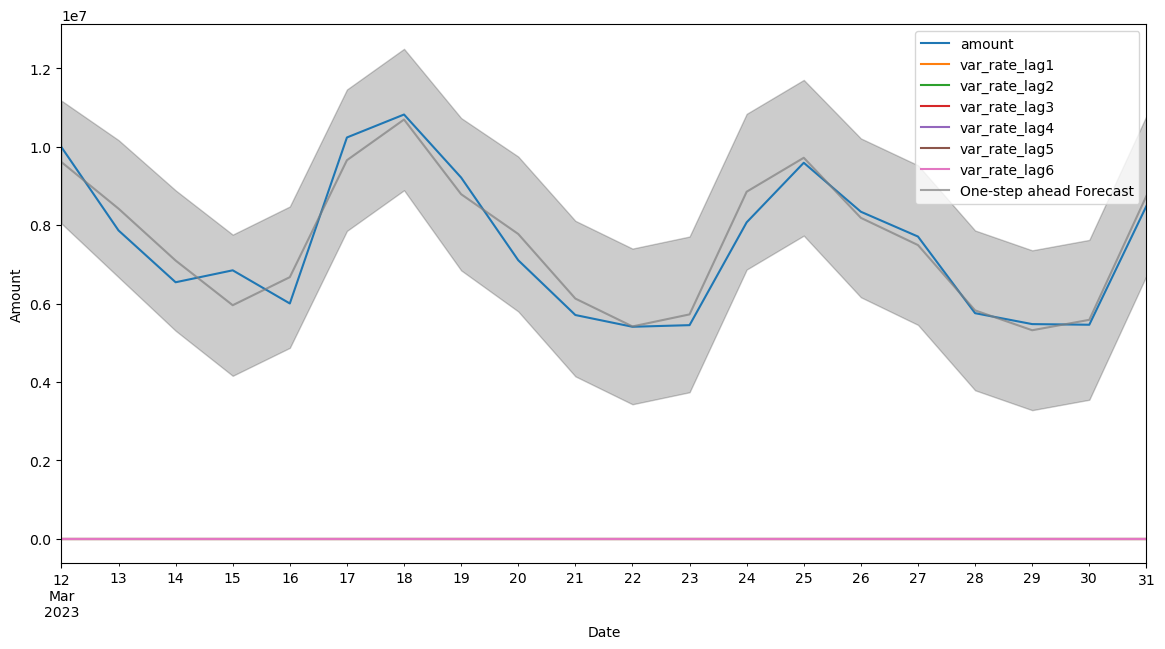

In [224]:
pred_ci3 = pred3.conf_int()

#print("conf_int:", pred_ci)
#print("mean:", pred.predicted_mean)
p = pred3.predicted_mean

ax = testdata3.plot(label='observed')
#ax = traindata.plot(label='observed')
pred3.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()

In [225]:
###NOW WE TEST CANCELLATIONS###

In [226]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'viamericas'
database_name2= 'analytics'
table1_name = 'forex_feed_market'
table2_name = 'daily_sales_count_cancelled_v2'##WE LOAD THE BASE WITH CANCELLATIONS

In [227]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
#df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table1_name};', conn)
df3 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{table2_name};', conn)

In [228]:
df3.shape

(101970, 5)

In [229]:
##WE NEED TO GO ONE STEP BACK, AND BEFORE GROUPING THE AMOUNT BY COUNTRY DATE AND PAYER, COUNT THE CANCELLATIONS (GENERATE THE TABLE IN ATHENA)

In [230]:
df3.head()

,payer,country,date,amount,tx_cancelled
0,BANCO DAYCOVAL,BRAZIL,2022-11-03,18428.26,2
1,BBVA - BANCOMER (BTS),MEXICO,2022-04-09,721684.70,64
2,BANCO BISA,BOLIVIA,2023-08-10,7737.00,1
3,TELEDOLAR,COSTA RICA,2023-01-28,136130.18,19
4,BANCO DE CREDITO DEL PERU - BCP (UT),PERU,2021-10-28,31990.00,3


In [231]:
##FILTERING MEXICO##

In [232]:
df_montos_mex2=df3.loc[df3.country=='MEXICO']

In [233]:
df_montos_mex2.amount.sum()

13655009099.176899

In [234]:
##AS PART OF A PILOT TEST WE WILL ONLY WORK WITH ONE PAYER, AND THEN WE WILL GENERALIZE THE ROUTINE##
## WE WILL NOW FIT A MODEL WITH LAGS OF THE CANCELLATIONS (SARIMAX) TO SEE IF IT PERFORMS BETTER THAN THE SIMPLE ARIMA MODEL.
##WE START WITH ELEKTRA AND THE CASE WITHOUT EXOGENOUS VARIABLES ##
df_pilot4=df_montos_mex2.loc[df_montos_mex2.payer=='ELEKTRA (MEXICO)']
df_pilot4.shape

(1025, 5)

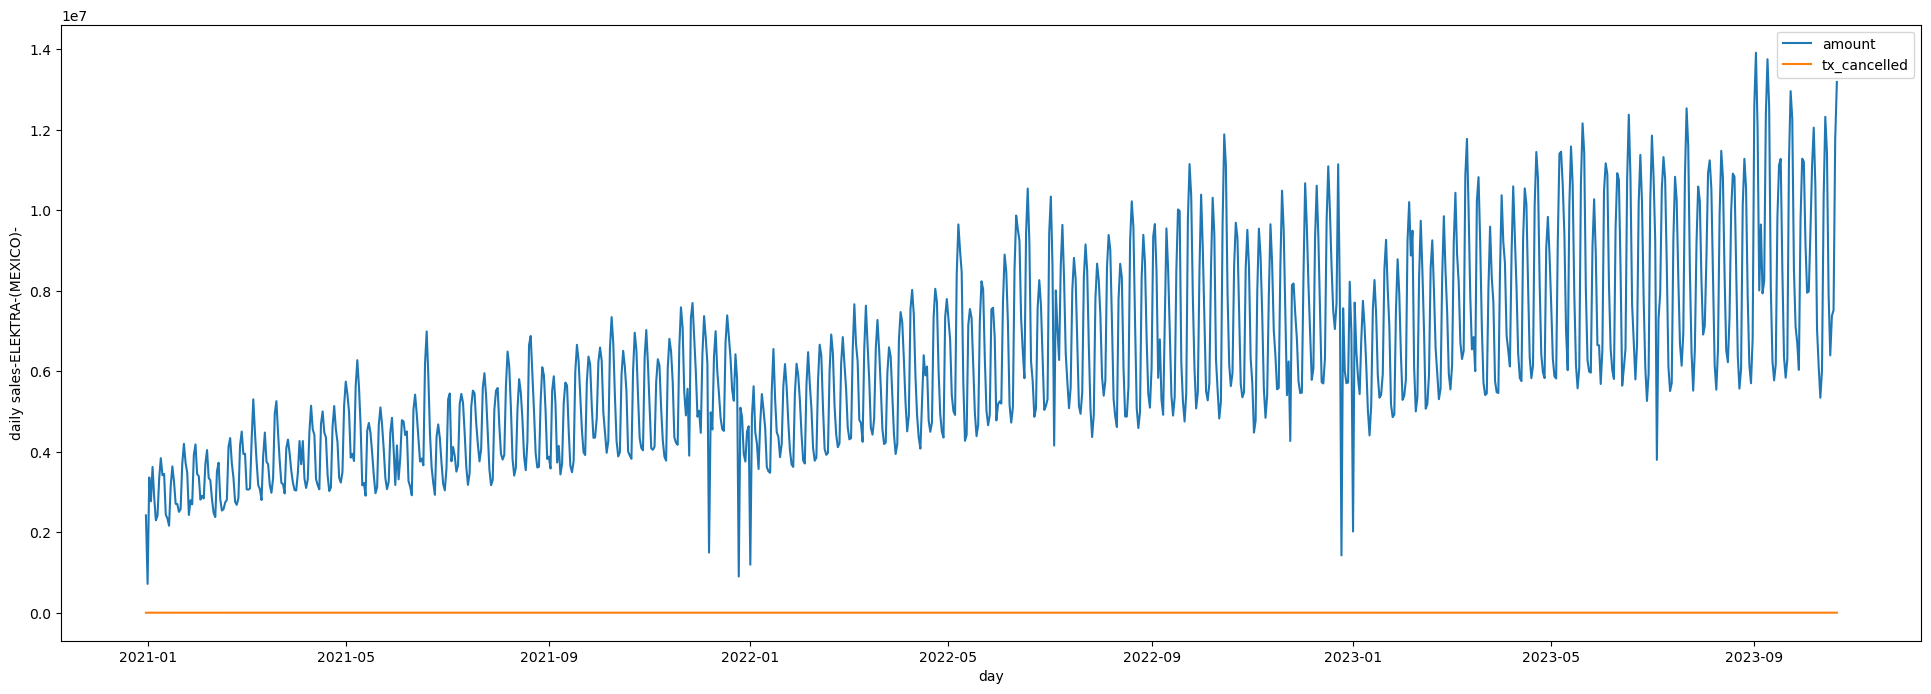

In [235]:
ax = df_pilot4.set_index('date').plot(figsize=(24, 8))
ax.set_ylabel('daily sales-ELEKTRA-(MEXICO)-')
ax.set_xlabel('day')
plt.show()

In [236]:
##TIME SERIES FORMAT
data = df_pilot4
data.dtypes #day object
data['date'] = pd.DatetimeIndex(data['date'])
df_pilot.dtypes   # datetime64[ns]

data.index  #RangeIndex()
data = data.set_index('date')

In [237]:
data = data.sort_values(by='date')
data.head()

,payer,country,amount,tx_cancelled
date,,,,
2020-12-31,ELEKTRA (MEXICO),MEXICO,2418346.71,278
2021-01-01,ELEKTRA (MEXICO),MEXICO,717241.42,94
2021-01-02,ELEKTRA (MEXICO),MEXICO,3360407.85,358
2021-01-03,ELEKTRA (MEXICO),MEXICO,2767481.77,278
2021-01-04,ELEKTRA (MEXICO),MEXICO,3621953.17,323


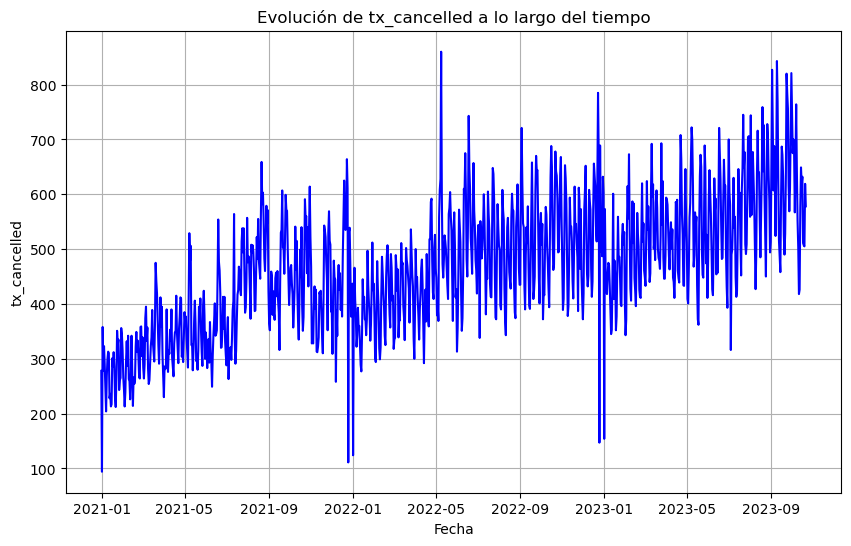

In [238]:

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['tx_cancelled'], linestyle='-', color='b')

plt.title('Evolución de tx_cancelled a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('tx_cancelled')
plt.grid(True)
plt.show()

In [239]:
for i in range(1, 8):
        nombre_columna = f'tx_cancelled_{i}'
        data[nombre_columna] = data['tx_cancelled'].shift(i)

In [240]:
##WE ELIMINATE STRING VARIABLES AND OTHER VARIABLES##
##WE ELIMINATE STRING VARIABLES##
data=data.loc[:,['amount', 'tx_cancelled_1', 'tx_cancelled_2', 'tx_cancelled_3', 'tx_cancelled_4', 'tx_cancelled_5', 'tx_cancelled_6', 'tx_cancelled_7']]

In [241]:
data.head()

,amount,tx_cancelled_1,tx_cancelled_2,tx_cancelled_3,tx_cancelled_4,tx_cancelled_5,tx_cancelled_6,tx_cancelled_7
date,,,,,,,,
2020-12-31,2418346.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,717241.42,278.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,3360407.85,94.0,278.0,NaN,NaN,NaN,NaN,NaN
2021-01-03,2767481.77,358.0,94.0,278.0,NaN,NaN,NaN,NaN
2021-01-04,3621953.17,278.0,358.0,94.0,278.0,NaN,NaN,NaN


In [242]:
data=data.fillna(method='bfill')
data=data.fillna(method='ffill')
data.head()

,amount,tx_cancelled_1,tx_cancelled_2,tx_cancelled_3,tx_cancelled_4,tx_cancelled_5,tx_cancelled_6,tx_cancelled_7
date,,,,,,,,
2020-12-31,2418346.71,278.0,278.0,278.0,278.0,278.0,278.0,278.0
2021-01-01,717241.42,278.0,278.0,278.0,278.0,278.0,278.0,278.0
2021-01-02,3360407.85,94.0,278.0,278.0,278.0,278.0,278.0,278.0
2021-01-03,2767481.77,358.0,94.0,278.0,278.0,278.0,278.0,278.0
2021-01-04,3621953.17,278.0,358.0,94.0,278.0,278.0,278.0,278.0


In [243]:
##WE DECOMPOSE THE SERIES INTO TREND, SEASONALITY AND RESIDUALS

In [244]:
data = data.sort_values(by='date')
data.head()

,amount,tx_cancelled_1,tx_cancelled_2,tx_cancelled_3,tx_cancelled_4,tx_cancelled_5,tx_cancelled_6,tx_cancelled_7
date,,,,,,,,
2020-12-31,2418346.71,278.0,278.0,278.0,278.0,278.0,278.0,278.0
2021-01-01,717241.42,278.0,278.0,278.0,278.0,278.0,278.0,278.0
2021-01-02,3360407.85,94.0,278.0,278.0,278.0,278.0,278.0,278.0
2021-01-03,2767481.77,358.0,94.0,278.0,278.0,278.0,278.0,278.0
2021-01-04,3621953.17,278.0,358.0,94.0,278.0,278.0,278.0,278.0


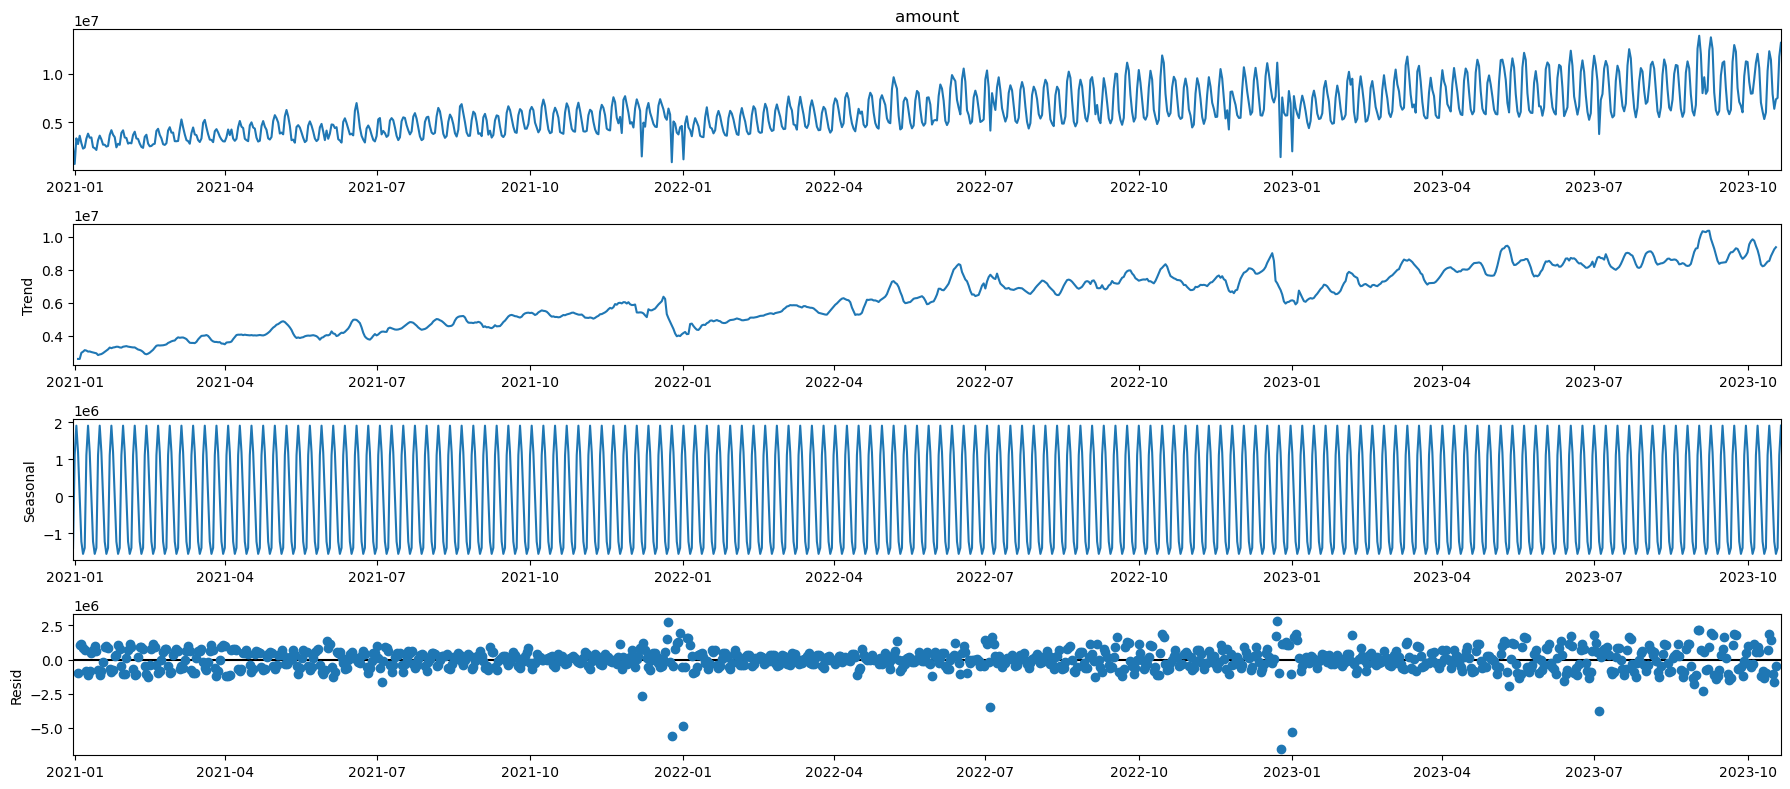

In [245]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data['amount'], model='additive', period=None) #multiplicative, additive
fig = decomposition.plot()
plt.show()

In [246]:
data['var_tx_cancelled_1']=data.tx_cancelled_1-data.tx_cancelled_2
data['var_tx_cancelled_2']=data.tx_cancelled_2-data.tx_cancelled_3
data['var_tx_cancelled_3']=data.tx_cancelled_3-data.tx_cancelled_4
data['var_tx_cancelled_4']=data.tx_cancelled_4-data.tx_cancelled_5
data['var_tx_cancelled_5']=data.tx_cancelled_5-data.tx_cancelled_6
data['var_tx_cancelled_6']=data.tx_cancelled_6-data.tx_cancelled_7
data.tail()

,amount,tx_cancelled_1,tx_cancelled_2,tx_cancelled_3,tx_cancelled_4,tx_cancelled_5,tx_cancelled_6,tx_cancelled_7,var_tx_cancelled_1,var_tx_cancelled_2,var_tx_cancelled_3,var_tx_cancelled_4,var_tx_cancelled_5,var_tx_cancelled_6
date,,,,,,,,,,,,,,
2023-10-17,6394084.62,632.0,618.0,649.0,577.0,426.0,418.0,503.0,14.0,-31.0,72.0,151.0,8.0,-85.0
2023-10-18,7372639.68,511.0,632.0,618.0,649.0,577.0,426.0,418.0,-121.0,14.0,-31.0,72.0,151.0,8.0
2023-10-19,7517141.00,507.0,511.0,632.0,618.0,649.0,577.0,426.0,-4.0,-121.0,14.0,-31.0,72.0,151.0
2023-10-20,11755749.86,505.0,507.0,511.0,632.0,618.0,649.0,577.0,-2.0,-4.0,-121.0,14.0,-31.0,72.0
2023-10-21,13185622.15,619.0,505.0,507.0,511.0,632.0,618.0,649.0,114.0,-2.0,-4.0,-121.0,14.0,-31.0


In [247]:
##WE ELIMINATE SOME VARIABLES##
data=data.loc[:,['amount', 'var_tx_cancelled_1', 'var_tx_cancelled_2', 'var_tx_cancelled_3', 'var_tx_cancelled_4', 'var_tx_cancelled_5', 'var_tx_cancelled_6']]
data.tail()

,amount,var_tx_cancelled_1,var_tx_cancelled_2,var_tx_cancelled_3,var_tx_cancelled_4,var_tx_cancelled_5,var_tx_cancelled_6
date,,,,,,,
2023-10-17,6394084.62,14.0,-31.0,72.0,151.0,8.0,-85.0
2023-10-18,7372639.68,-121.0,14.0,-31.0,72.0,151.0,8.0
2023-10-19,7517141.00,-4.0,-121.0,14.0,-31.0,72.0,151.0
2023-10-20,11755749.86,-2.0,-4.0,-121.0,14.0,-31.0,72.0
2023-10-21,13185622.15,114.0,-2.0,-4.0,-121.0,14.0,-31.0


In [248]:
##SARIMAX PARAMETER SEARCH##

In [249]:
traindata3 = data[0:801] #data[0:800]
traindata3.index

DatetimeIndex(['2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09',
               ...
               '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05',
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11'],
              dtype='datetime64[ns]', name='date', length=801, freq=None)

In [250]:
testdata3 = data[801:1025] #data[0:1025]
testdata3.index

DatetimeIndex(['2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21',
               ...
               '2023-10-12', '2023-10-13', '2023-10-14', '2023-10-15',
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-21'],
              dtype='datetime64[ns]', name='date', length=224, freq=None)

In [251]:
traindata3.shape, testdata3.shape

((801, 7), (224, 7))

In [252]:
traindata3

,amount,var_tx_cancelled_1,var_tx_cancelled_2,var_tx_cancelled_3,var_tx_cancelled_4,var_tx_cancelled_5,var_tx_cancelled_6
date,,,,,,,
2020-12-31,2418346.71,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01,717241.42,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-02,3360407.85,-184.0,0.0,0.0,0.0,0.0,0.0
2021-01-03,2767481.77,264.0,-184.0,0.0,0.0,0.0,0.0
2021-01-04,3621953.17,-80.0,264.0,-184.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-07,6714104.10,42.0,-88.0,106.0,85.0,-16.0,-12.0
2023-03-08,6303632.59,-84.0,42.0,-88.0,106.0,85.0,-16.0
2023-03-09,6504306.53,-54.0,-84.0,42.0,-88.0,106.0,85.0


In [253]:
##WE TRY ANOTHER LIBRARY THAT DOES NOT HAVE PROBLEMS IN ADOPTING EXOGENOUS VARIABLES ##

###CLAVE: VER COMO ENTRENAR EL MODELO CON VARS EXOGENAS, NOTAR QUE ARRIBA SE LO ENTRENA CON AUTOARIMA (PROBLEMA, AUTOARIMA NO CAPTA POR ALGUNA RAZON LAS EXOGENAS)

import statsmodels.api as sm

###WE IMPUTE THE MISSING VALUES THAT GENERATE THE DIFFERENCES WITH SUBSEQUENT VALUES CLOSE IN TIME

exog3=['var_tx_cancelled_1', 'var_tx_cancelled_2', 'var_tx_cancelled_3', 'var_tx_cancelled_4', 'var_tx_cancelled_5', 'var_tx_cancelled_6']
mod2 = sm.tsa.SARIMAX(traindata3[['amount']], order=(1,0,0), seasonal_order =(2, 1, 2, 7), exog=traindata3[exog3])
res2 = mod2.fit(maxiter=1000, disp=False)
print(res2.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                 amount   No. Observations:                  801
Model:             SARIMAX(1, 0, 0)x(2, 1, [1, 2], 7)   Log Likelihood              -11872.999
Date:                                Mon, 08 Jan 2024   AIC                          23769.998
Time:                                        14:30:20   BIC                          23826.123
Sample:                                    12-31-2020   HQIC                         23791.567
                                         - 03-11-2023                                         
Covariance Type:                                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
var_tx_cancelled_1  3060.7966    567.528      5.393      0.000    

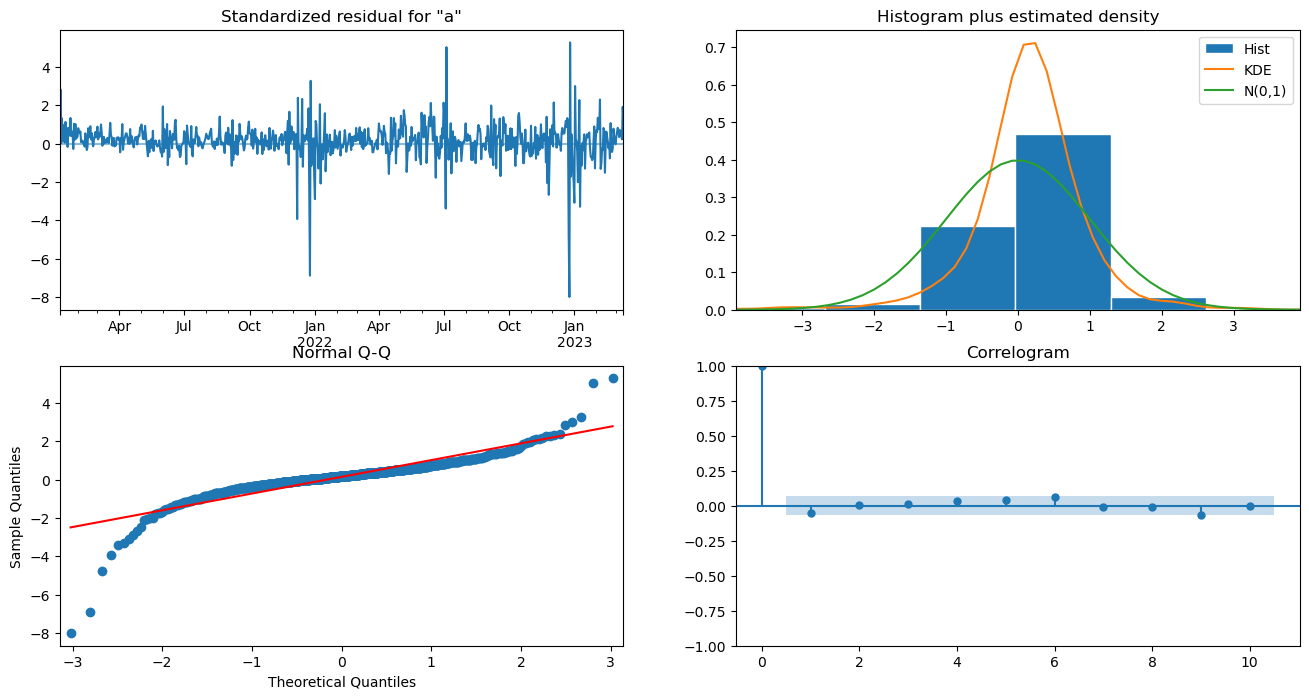

In [254]:
res2.plot_diagnostics(figsize=(16, 8))
plt.show()

In [255]:
testdata3=testdata3[0:20]
pred3 = res2.get_prediction(start=pd.to_datetime('2023-03-12'),end=pd.to_datetime('2023-03-31'), dynamic=False, exog=testdata3[exog3])
pred_test3 = pred3.conf_int()
res2 = pred3.predicted_mean
pred_test3["result"] = pred3.predicted_mean
pred_test3["y"] = testdata3['amount']
print("pred_test2:\n", pred_test3)

pred_test2:
             lower amount  upper amount        result             y
2023-03-12  7.552916e+06  1.084889e+07  9.200903e+06  9.990582e+06
2023-03-13  6.431344e+06  1.000083e+07  8.216087e+06  7.865035e+06
2023-03-14  4.622948e+06  8.237616e+06  6.430282e+06  6.543219e+06
2023-03-15  3.963212e+06  7.585633e+06  5.774422e+06  6.847888e+06
2023-03-16  4.297436e+06  7.921194e+06  6.109315e+06  6.002096e+06
2023-03-17  7.644349e+06  1.126834e+07  9.456344e+06  1.023570e+07
2023-03-18  8.658882e+06  1.228291e+07  1.047090e+07  1.082097e+07
2023-03-19  6.355589e+06  1.036298e+07  8.359284e+06  9.213543e+06
2023-03-20  5.668103e+06  9.738099e+06  7.703101e+06  7.104772e+06
2023-03-21  3.647344e+06  7.728065e+06  5.687705e+06  5.707731e+06
2023-03-22  3.487863e+06  7.570435e+06  5.529149e+06  5.407997e+06
2023-03-23  3.953702e+06  8.036594e+06  5.995148e+06  5.449343e+06
2023-03-24  7.191076e+06  1.127402e+07  9.232549e+06  8.071606e+06
2023-03-25  8.001783e+06  1.208474e+07  1.004326e

In [256]:
#FORECAST PERFORMANCE
##DEFINITIONS:
##The MAPE measures the average percentage error between predictions and actual values.
##The MAE is the arithmetic mean of the absolute errors between predictions and actual values.
##The RMSE measures the root mean square of the root mean square errors between predictions and actual values.
import numpy as np
pred_test3["ae"] = abs(pred_test3["y"]-pred_test3["result"])
mae = pred_test3["ae"].mean() 
print("mae:", mae)
mse = ((pred_test3["y"]-pred_test3["result"])**2).mean()
rmse = np.sqrt(mse)
print("rmse:", rmse)

pred_test3["pe"] = abs((pred_test3["y"]-pred_test3["result"]) / pred_test3["y"])
mape = pred_test3["pe"].mean() 
print("mape:", mape)

mae: 446762.4972876368
rmse: 560613.3146220142
mape: 0.05774643880849352


In [257]:
##PROXIMO PASO: ESTIMAR EL ERROR CON LOS DOS GRUPOS DE EXOGENAS JUNTAS(RATES Y CANCELACIONES)##

In [258]:
data.head()

,amount,var_tx_cancelled_1,var_tx_cancelled_2,var_tx_cancelled_3,var_tx_cancelled_4,var_tx_cancelled_5,var_tx_cancelled_6
date,,,,,,,
2020-12-31,2418346.71,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01,717241.42,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-02,3360407.85,-184.0,0.0,0.0,0.0,0.0,0.0
2021-01-03,2767481.77,264.0,-184.0,0.0,0.0,0.0,0.0
2021-01-04,3621953.17,-80.0,264.0,-184.0,0.0,0.0,0.0


In [259]:
del data3['amount']

In [260]:
data_rates_canc=pd.merge(data,data3, left_index=True, right_index=True, how='left')

In [261]:
data_rates_canc.head()

,amount,var_tx_cancelled_1,var_tx_cancelled_2,var_tx_cancelled_3,var_tx_cancelled_4,var_tx_cancelled_5,var_tx_cancelled_6,var_rate_lag1,var_rate_lag2,var_rate_lag3,var_rate_lag4,var_rate_lag5,var_rate_lag6
date,,,,,,,,,,,,,
2020-12-31,2418346.71,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2021-01-01,717241.42,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2021-01-02,3360407.85,-184.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2021-01-03,2767481.77,264.0,-184.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2021-01-04,3621953.17,-80.0,264.0,-184.0,0.0,0.0,0.0,-0.054,0.0,0.0,0.0,0.0,0.0


In [262]:
data_rates_canc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1025 entries, 2020-12-31 to 2023-10-21
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   amount              1025 non-null   float64
 1   var_tx_cancelled_1  1025 non-null   float64
 2   var_tx_cancelled_2  1025 non-null   float64
 3   var_tx_cancelled_3  1025 non-null   float64
 4   var_tx_cancelled_4  1025 non-null   float64
 5   var_tx_cancelled_5  1025 non-null   float64
 6   var_tx_cancelled_6  1025 non-null   float64
 7   var_rate_lag1       1025 non-null   float64
 8   var_rate_lag2       1025 non-null   float64
 9   var_rate_lag3       1025 non-null   float64
 10  var_rate_lag4       1025 non-null   float64
 11  var_rate_lag5       1025 non-null   float64
 12  var_rate_lag6       1025 non-null   float64
dtypes: float64(13)
memory usage: 144.4 KB


In [263]:
traindata3 = data_rates_canc[0:801] #data[0:800]
traindata3.index

DatetimeIndex(['2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09',
               ...
               '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05',
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11'],
              dtype='datetime64[ns]', name='date', length=801, freq=None)

In [264]:
testdata3 = data_rates_canc[801:1025] #data[0:1025]
testdata3.index

DatetimeIndex(['2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21',
               ...
               '2023-10-12', '2023-10-13', '2023-10-14', '2023-10-15',
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-21'],
              dtype='datetime64[ns]', name='date', length=224, freq=None)

In [265]:
traindata3.shape, testdata3.shape

((801, 13), (224, 13))

In [266]:
traindata3.head()

,amount,var_tx_cancelled_1,var_tx_cancelled_2,var_tx_cancelled_3,var_tx_cancelled_4,var_tx_cancelled_5,var_tx_cancelled_6,var_rate_lag1,var_rate_lag2,var_rate_lag3,var_rate_lag4,var_rate_lag5,var_rate_lag6
date,,,,,,,,,,,,,
2020-12-31,2418346.71,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2021-01-01,717241.42,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2021-01-02,3360407.85,-184.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2021-01-03,2767481.77,264.0,-184.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2021-01-04,3621953.17,-80.0,264.0,-184.0,0.0,0.0,0.0,-0.054,0.0,0.0,0.0,0.0,0.0


In [267]:
##WE TRY ANOTHER LIBRARY THAT DOES NOT HAVE PROBLEMS IN ADOPTING EXOGENOUS VARIABLES ##

###CLAVE: VER COMO ENTRENAR EL MODELO CON VARS EXOGENAS, NOTAR QUE ARRIBA SE LO ENTRENA CON AUTOARIMA (PROBLEMA, AUTOARIMA NO CAPTA POR ALGUNA RAZON LAS EXOGENAS)

import statsmodels.api as sm

###WE IMPUTE THE MISSING VALUES THAT GENERATE THE DIFFERENCES WITH SUBSEQUENT VALUES CLOSE IN TIME

exog3=['var_tx_cancelled_1', 'var_tx_cancelled_2', 'var_tx_cancelled_3', 'var_tx_cancelled_4', 'var_tx_cancelled_5', 'var_tx_cancelled_6','var_rate_lag1', 'var_rate_lag2', 'var_rate_lag3', 'var_rate_lag4', 'var_rate_lag5', 'var_rate_lag6'] 
mod2 = sm.tsa.SARIMAX(traindata3[['amount']], order=(1,0,0), seasonal_order =(2, 1, 2, 7), exog=traindata3[exog3])
res2 = mod2.fit(maxiter=1000, disp=False)
print(res2.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                 amount   No. Observations:                  801
Model:             SARIMAX(1, 0, 0)x(2, 1, [1, 2], 7)   Log Likelihood              -11848.627
Date:                                Mon, 08 Jan 2024   AIC                          23733.255
Time:                                        14:30:29   BIC                          23817.442
Sample:                                    12-31-2020   HQIC                         23765.607
                                         - 03-11-2023                                         
Covariance Type:                                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
var_tx_cancelled_1  2546.0081    602.950      4.223      0.000    

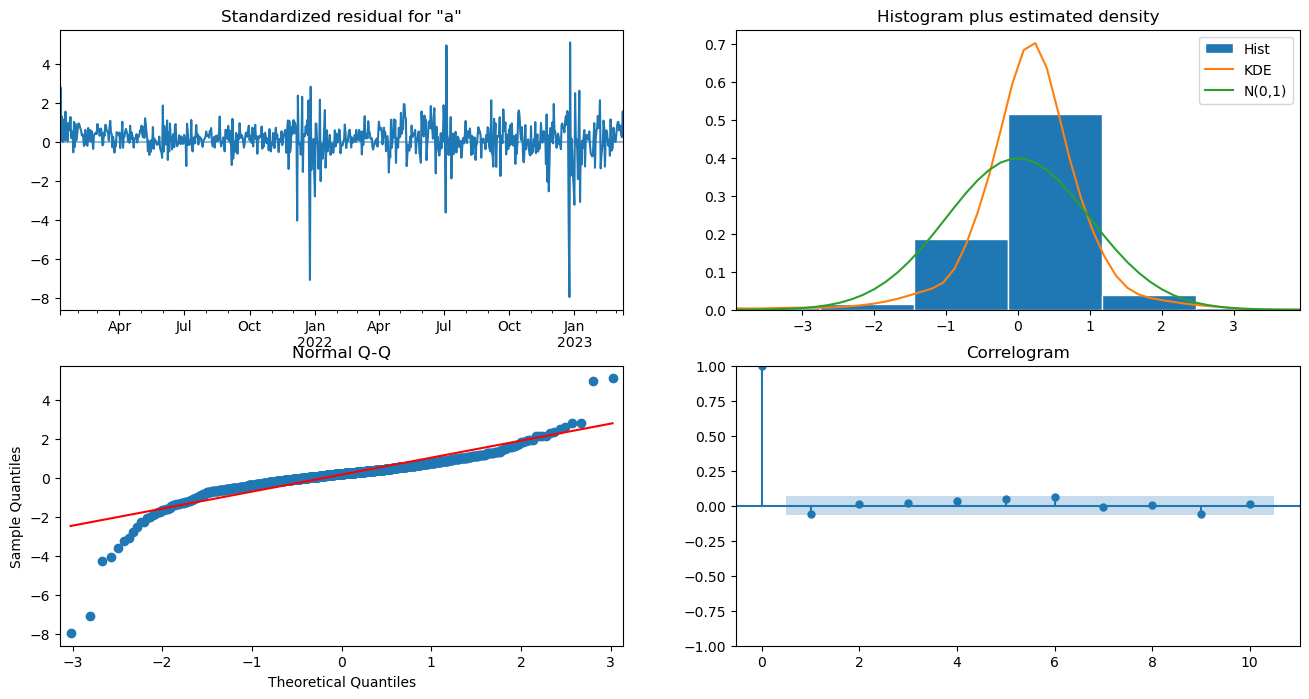

In [268]:
res2.plot_diagnostics(figsize=(16, 8))
plt.show()

In [269]:
testdata3=testdata3[0:20]
pred3 = res2.get_prediction(start=pd.to_datetime('2023-03-12'),end=pd.to_datetime('2023-03-31'), dynamic=False, exog=testdata3[exog3])
pred_test3 = pred3.conf_int()
res2 = pred3.predicted_mean
pred_test3["result"] = pred3.predicted_mean
pred_test3["y"] = testdata3['amount']
print("pred_test2:\n", pred_test3)

pred_test2:
             lower amount  upper amount        result             y
2023-03-12  7.865763e+06  1.106155e+07  9.463658e+06  9.990582e+06
2023-03-13  6.695843e+06  1.012332e+07  8.409580e+06  7.865035e+06
2023-03-14  5.183384e+06  8.644330e+06  6.913857e+06  6.543219e+06
2023-03-15  4.170288e+06  7.636234e+06  5.903261e+06  6.847888e+06
2023-03-16  4.928924e+06  8.395621e+06  6.662272e+06  6.002096e+06
2023-03-17  7.915394e+06  1.138220e+07  9.648798e+06  1.023570e+07
2023-03-18  8.813512e+06  1.228034e+07  1.054693e+07  1.082097e+07
2023-03-19  6.733327e+06  1.055914e+07  8.646231e+06  9.213543e+06
2023-03-20  5.812397e+06  9.689272e+06  7.750834e+06  7.104772e+06
2023-03-21  3.934332e+06  7.818822e+06  5.876577e+06  5.707731e+06
2023-03-22  3.446158e+06  7.331790e+06  5.388974e+06  5.407997e+06
2023-03-23  3.916261e+06  7.802066e+06  5.859163e+06  5.449343e+06
2023-03-24  7.006543e+06  1.089237e+07  8.949458e+06  8.071606e+06
2023-03-25  7.778319e+06  1.166415e+07  9.721236e

In [270]:
#FORECAST PERFORMANCE
##DEFINITIONS:
##The MAPE measures the average percentage error between predictions and actual values.
##The MAE is the arithmetic mean of the absolute errors between predictions and actual values.
##The RMSE measures the root mean square of the root mean square errors between predictions and actual values.
import numpy as np
pred_test3["ae"] = abs(pred_test3["y"]-pred_test3["result"])
mae = pred_test3["ae"].mean() 
print("mae:", mae)
mse = ((pred_test3["y"]-pred_test3["result"])**2).mean()
rmse = np.sqrt(mse)
print("rmse:", rmse)

pred_test3["pe"] = abs((pred_test3["y"]-pred_test3["result"]) / pred_test3["y"])
mape = pred_test3["pe"].mean() 
print("mape:", mape)

mae: 392099.2496297116
rmse: 470164.1007226488
mape: 0.052886296297807465


In [271]:
###VA BAJANDO!!!!!!!!! (Y AUN FALTA OPTIMIZARLO CON AUTOARIMA, AGREGAR DUMMIES DE DIAS DE LA SEMANA, FERIADOS ETC###


In [272]:
stop

NameError: name 'stop' is not defined